In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
lck = "spring_2020/lck_spring_2020.csv"
lec = "spring_2020/lec_spring_2020.csv"
lpl= "spring_2020/lpl_spring_2020.csv"
lcs= "spring_2020/lcs_spring_2020.csv"
region = "spring_2020/region_games.csv"
total = "spring_2020/total_data.csv"
min_d = "spring_2020/min_diversity.csv"
max_d = "spring_2020/max_diversity.csv"

# Read the mouse data and the study results
lck_data = pd.read_csv(lck)
lec_data = pd.read_csv(lec)
lpl_data = pd.read_csv(lpl)
lcs_data = pd.read_csv(lcs)
min_diversity = pd.read_csv(min_d)
max_diversity = pd.read_csv(max_d)
region_data = pd.read_csv(region)
total_data = pd.read_csv(total)

In [3]:
lck_data['Presence']=pd.to_numeric(lck_data['Presence'].str.replace('%',''))
lcs_data['Presence']=pd.to_numeric(lcs_data['Presence'].str.replace('%',''))
lec_data['Presence']=pd.to_numeric(lec_data['Presence'].str.replace('%',''))
lpl_data['Presence']=pd.to_numeric(lpl_data['Presence'].str.replace('%',''))

In [4]:
lck_data['Winrate']=pd.to_numeric(lck_data['Winrate'].str.replace('%',''))
lcs_data['Winrate']=pd.to_numeric(lcs_data['Winrate'].str.replace('%',''))
lec_data['Winrate']=pd.to_numeric(lec_data['Winrate'].str.replace('%',''))
lpl_data['Winrate']=pd.to_numeric(lpl_data['Winrate'].str.replace('%',''))

In [5]:
region_data

,region,total_games
0,LCK,223
1,LCS,94
2,LEC,90
3,LPL,330


In [6]:
lck_data['True Presence']= (lck_data['Picks']+lck_data['Bans'])/223*100
lcs_data['True Presence']= (lcs_data['Picks']+lcs_data['Bans'])/94*100
lec_data['True Presence']= (lec_data['Picks']+lec_data['Bans'])/90*100
lpl_data['True Presence']= (lpl_data['Picks']+lpl_data['Bans'])/330*100

In [53]:
lck_data.to_csv('spring_2020/cleaned/lck_data.csv')
lcs_data.to_csv('spring_2020/cleaned/lcs_data.csv')
lec_data.to_csv('spring_2020/cleaned/lec_data.csv')
lpl_data.to_csv('spring_2020/cleaned/lpl_data.csv')

In [55]:
lck_data=lck_data.set_index('Champion')
lec_data=lec_data.set_index('Champion')
lpl_data=lpl_data.set_index('Champion')
lcs_data=lcs_data.set_index('Champion')

In [56]:
lck_data.to_html('raw_data_html/lck_data.html')
lcs_data.to_html('raw_data_html/lcs_data.html')
lec_data.to_html('raw_data_html/lec_data.html')
lpl_data.to_html('raw_data_html/lpl_data.html')

In [8]:
def champ_diversity(data,region):
    data = data.loc[(data['True Presence']>0)]
    plt.figure(figsize=(15,8))
    x=np.arange(len(data))
    plt.xticks(x[::3], data.Champion[::3],rotation=90, fontsize=10)
    plt.yticks(np.arange(0,110,10))
    plt.margins(x=0)
    plt.axhline(y=13.51,ls='--',color='red',alpha=.75)
    plt.axhline(y=50,ls='--',color='purple',alpha=.75)
    
    plt.title(f'{region} Spring Split 2020 Champion Diversity')
    plt.ylabel('Presence, Picks + Bans (%)')
    
    plt.annotate('perfect diversity',(len(data.Champion)-20,14.5),color='red')
    plt.plot(data.Champion,data['True Presence'],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images/{region[:3]}_diversity.png")
    plt.show()
    
    print(f'{len(data)} unique champs were played')

In [9]:
def sim_diversity(data,region):
    data = data.loc[(data.Picks > 0) | (data.Bans > 0)]
    plt.figure(figsize=(15,8))
    x=np.arange(len(data))
    plt.xticks(x[::3], data.Champion[::3],rotation=90, fontsize=10)
    plt.yticks(np.arange(0,110,10))
    plt.margins(x=0)
    plt.axhline(y=13.51,ls='-',color='darkblue',alpha=.75)
    
    plt.title(f'{region}')
    plt.ylabel('Presence, Picks + Bans (%)')
    
    plt.annotate('perfect diversity',(len(data.Champion)-20,14.5),color='darkblue')
    plt.plot(data.Champion,data['True Presence'],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images/{region[:3]}_diversity.png")
    plt.show()


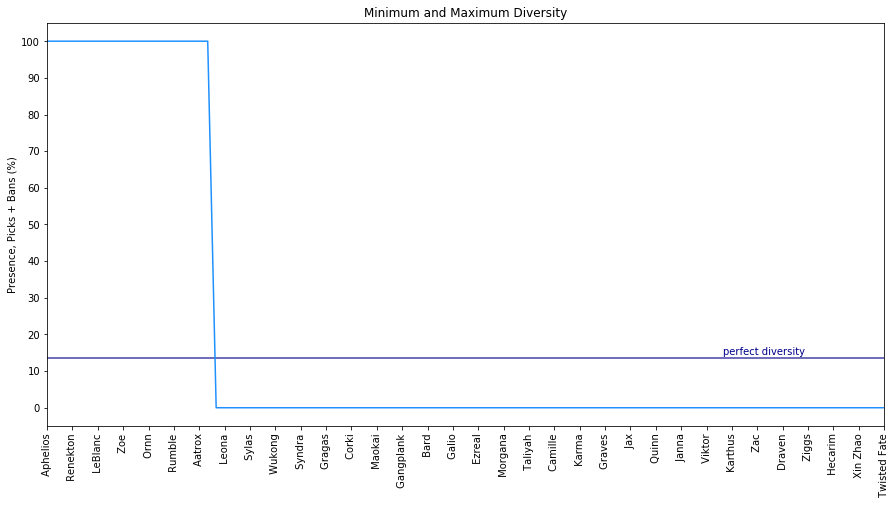

In [10]:
sim_diversity(min_diversity,'Minimum and Maximum Diversity')

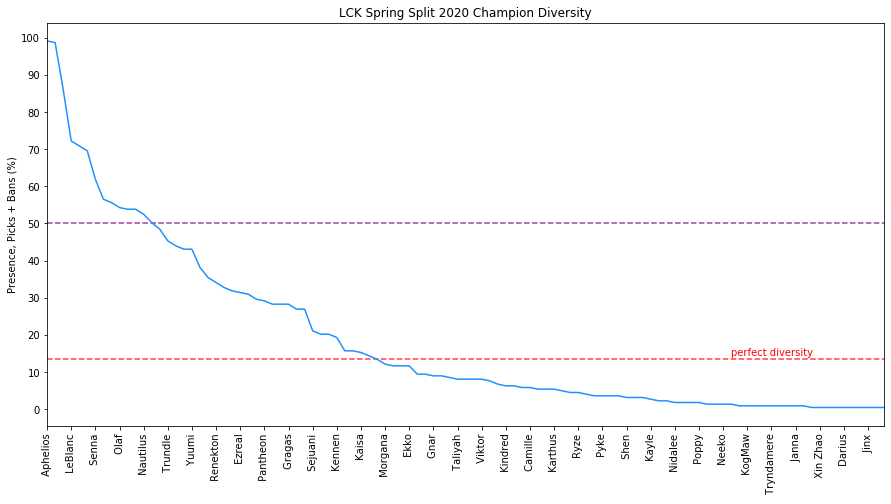

105 unique champs were played


In [11]:
champ_diversity(lck_data,'LCK')

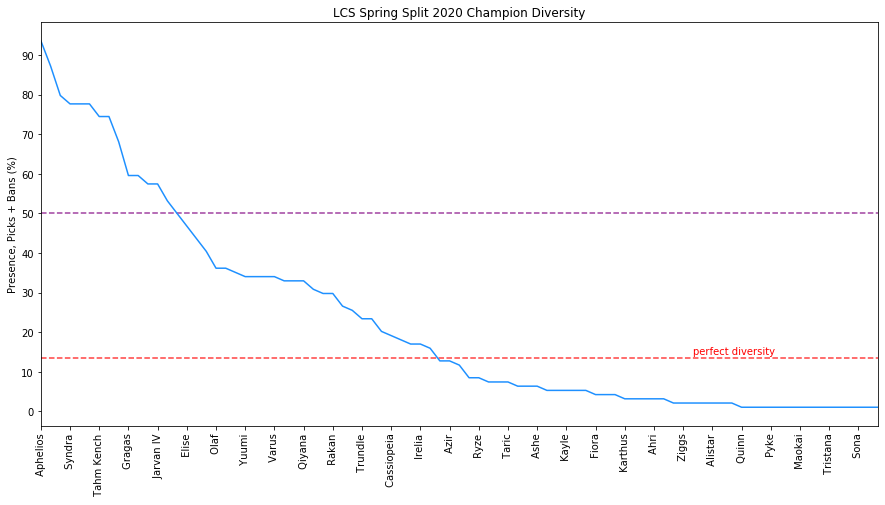

87 unique champs were played


In [12]:
champ_diversity(lcs_data,'LCS')

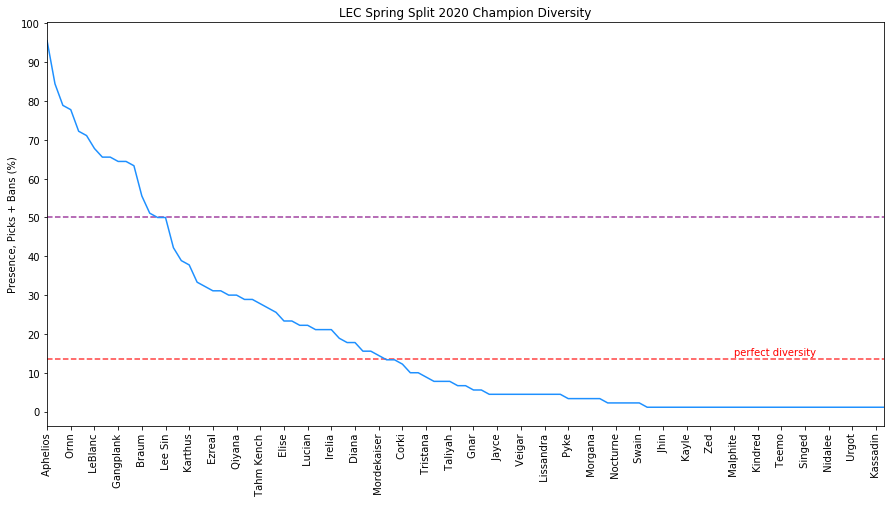

107 unique champs were played


In [13]:
champ_diversity(lec_data,'LEC')

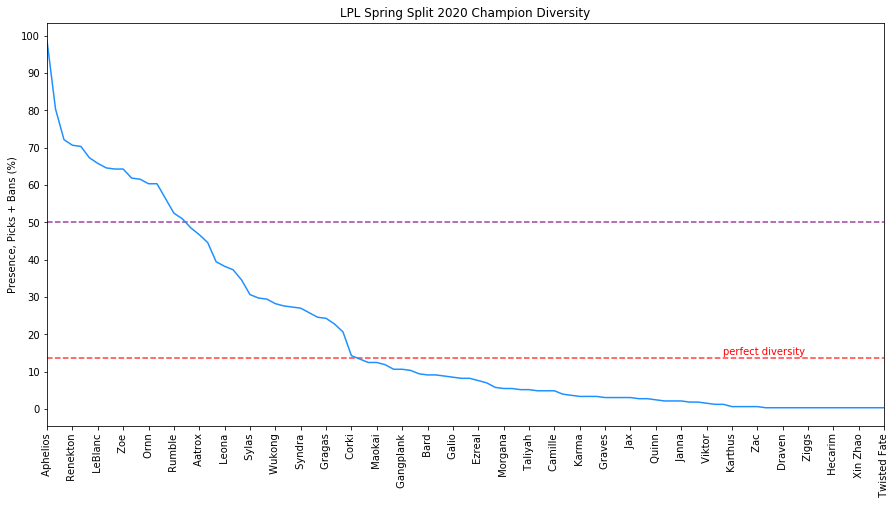

100 unique champs were played


In [14]:
champ_diversity(lpl_data,'LPL')

In [15]:
diversity_scale = (100-13.51)*20 + 13.51*(128)
def diversity_calc(data):
    return((1-sum([abs(i-13.51) for i in data['True Presence']])/diversity_scale)*100)

In [16]:
region_list=['LCK','LEC','LCS','LPL','All']

diversity_list = [
diversity_calc(lck_data),
diversity_calc(lec_data),
diversity_calc(lcs_data),
diversity_calc(lpl_data),
diversity_calc(total_data)]

In [17]:
diversity_scale = pd.DataFrame({'region':region_list,'diversity':diversity_list})
diversity_scale = diversity_scale.sort_values("diversity")
diversity_scale

,region,diversity
2,LCS,26.921892
3,LPL,28.163225
1,LEC,30.846802
0,LCK,31.856712
4,All,32.318233


In [18]:
# from functools import reduce

In [19]:
# data_frames=[lck_data,lcs_data,lpl_data,lec_data]
# total_data = reduce(lambda  left,right: pd.merge(left,right,on=['Champion'],
#                                             how='outer'), data_frames)

In [20]:
# pd.DataFrame.to_csv(total_data, 'spring_2020/total_data.csv', index=False)

In [21]:
total_data

,Champion,Picks_x,Bans_x,Picks_y,Bans_y,Picks_x.1,Bans_x.1,Picks_y.1,Bans_y.1,Picks,Bans,True Presence
0,Aphelios,65,156,47,41,106,219,46,40,264,456,97.693351
1,Sett,82,138,34,48,90,175,38,27,244,388,85.753053
2,Ornn,94,98,27,46,113,86,28,42,262,272,72.455902
3,LeBlanc,36,125,14,56,66,151,22,39,138,371,69.063772
4,Senna,42,96,25,48,58,154,22,42,147,340,66.078697
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Shaco,0,0,0,0,0,0,0,0,0,0,0.000000
144,Yorick,0,0,0,0,0,0,0,0,0,0,0.000000
145,Udyr,0,0,0,0,0,0,0,0,0,0,0.000000
146,Fiddlesticks,0,0,0,0,0,0,0,0,0,0,0.000000


In [22]:
total_data[:20]

,Champion,Picks_x,Bans_x,Picks_y,Bans_y,Picks_x.1,Bans_x.1,Picks_y.1,Bans_y.1,Picks,Bans,True Presence
0,Aphelios,65,156,47,41,106,219,46,40,264,456,97.693351
1,Sett,82,138,34,48,90,175,38,27,244,388,85.753053
2,Ornn,94,98,27,46,113,86,28,42,262,272,72.455902
3,LeBlanc,36,125,14,56,66,151,22,39,138,371,69.063772
4,Senna,42,96,25,48,58,154,22,42,147,340,66.078697
5,Jarvan IV,98,57,28,26,119,113,16,22,261,218,64.993216
6,Zoe,67,91,33,21,69,143,16,4,185,259,60.244233
7,Nautilus,77,40,38,9,148,55,40,17,303,121,57.530529
8,Elise,38,74,14,30,67,171,13,8,132,283,56.309362
9,Miss Fortune,114,12,34,7,178,21,38,8,364,48,55.902307


In [23]:
total_data1 = total_data.loc[total_data['True Presence']>0]
#total_data1

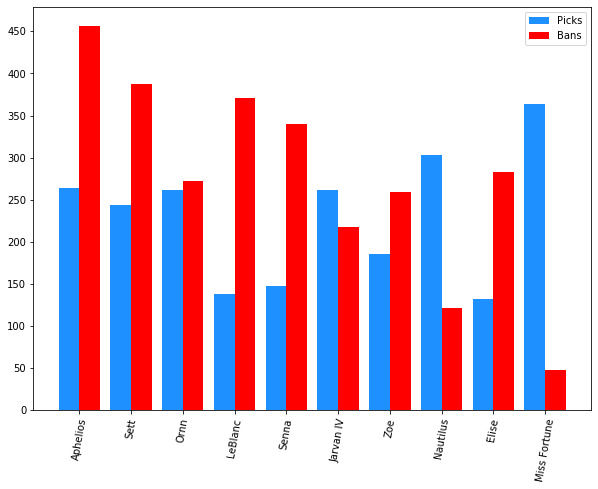

In [24]:
xtix=np.arange(10)
x = total_data[:10].Champion
y1= total_data[:10].Picks
y2 = total_data[:10].Bans

width = 0.4       # the width of the bars


plt.figure(figsize=(10,8))

ax = plt.subplot()
rects1 = ax.bar(xtix, y1,width, color='dodgerblue')

rects2 = ax.bar(xtix+width, y2, width, color='red')

# add some
#ax.set_ylabel('Scores')
ax.set_yticks(np.arange(0,500,50))
ax.set_title('')
ax.set_xticks(xtix + width / 2)
ax.set_xticklabels(x,rotation=80)
ax.legend( (rects1[0], rects2[0]), ('Picks', 'Bans') )
plt.gcf().subplots_adjust(bottom=0.18)


plt.show()

In [25]:
ban_data = total_data.sort_values("Bans",ascending = False)
pick_data = total_data.sort_values("Picks",ascending = False)

In [26]:
def top_picks(data,region):
    
    data = data.sort_values("Picks",ascending = False)
    data = data.reset_index(drop=True)
    plt.figure(figsize=(10,8))
    if data.Picks[0]<100:
        ytix=np.arange(0,110,10)
        
    elif data.Picks[0]<250:
        ytix=np.arange(0,280,20)
        
    else:
        ytix=np.arange(0,600,50)
        
    
    plt.xticks(rotation=70)
    plt.yticks(ytix)
    
    plt.margins(x=.02)
    plt.title(f'{region} Spring Split 2020 Top Picked Champions')

    plt.bar(data.Champion[:15],data.Picks[:15],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images/{region[:3]}_picks.png")
    plt.show()

In [27]:
def top_bans(data,region): 
    
    data = data.sort_values("Bans",ascending = False)
    data = data.reset_index(drop=True)
    plt.figure(figsize=(10,8))
    if data.Bans[0]<100:
        ytix=np.arange(0,110,10)
        
    elif data.Bans[0]<250:
        ytix=np.arange(0,280,20)
        
    else:
        ytix=np.arange(0,600,50)
        
    
    plt.xticks(rotation=70)
    plt.yticks(ytix)
    
    plt.margins(x=.02)
    plt.title(f'{region} Spring Split 2020 Top Banned Champions')

    plt.bar(data.Champion[:15],data.Bans[:15],color='red')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images/{region[:3]}_bans.png")
    plt.show()

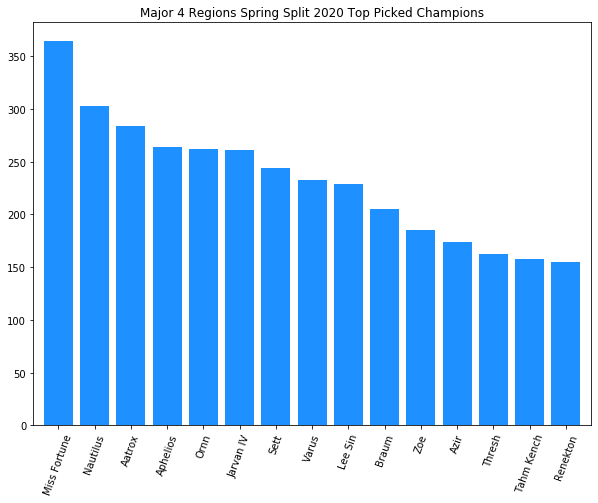

In [28]:
top_picks(total_data, 'Major 4 Regions')

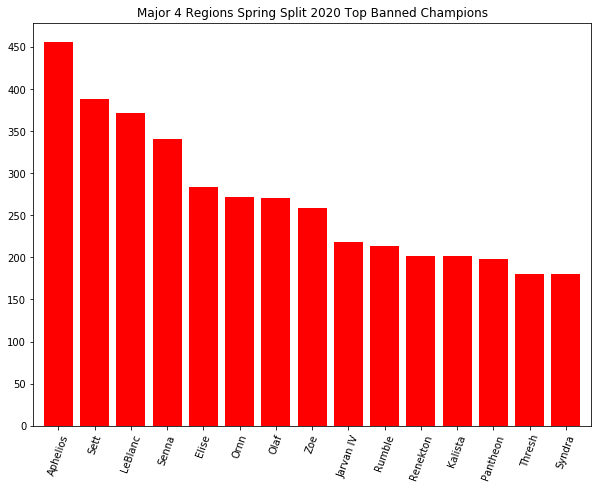

In [29]:
top_bans(total_data, 'Major 4 Regions')

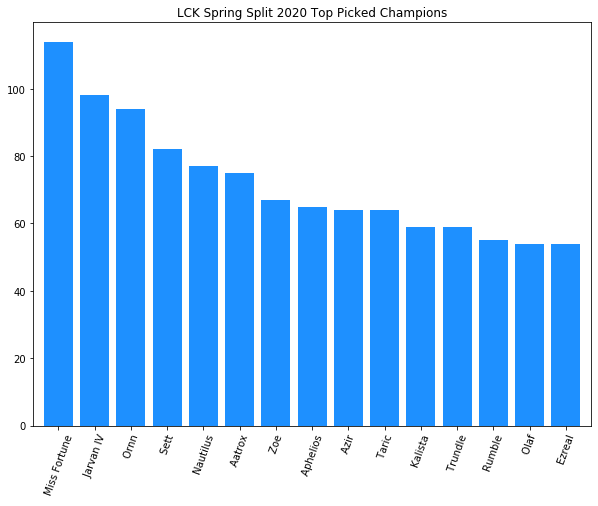

65

In [30]:
top_picks(lck_data,'LCK')
lck_data.Picks[0]

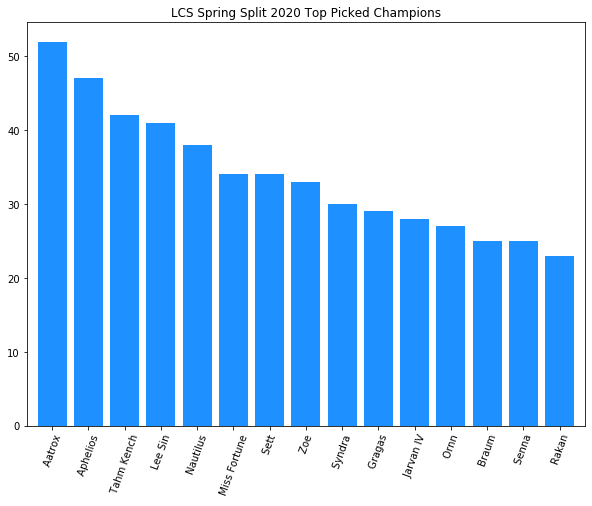

47

In [31]:
top_picks(lcs_data,'LCS')
lcs_data.Picks[0]

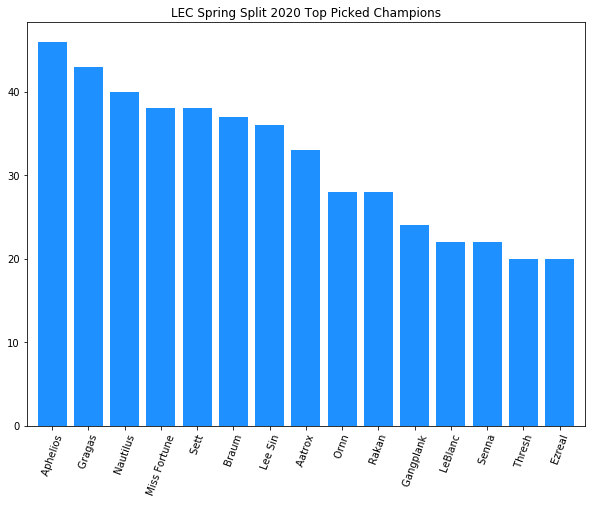

In [32]:
top_picks(lec_data,'LEC')

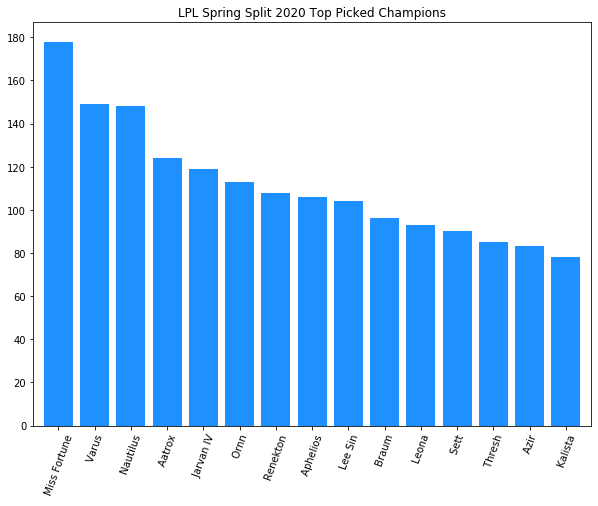

In [33]:
top_picks(lpl_data,'LPL')

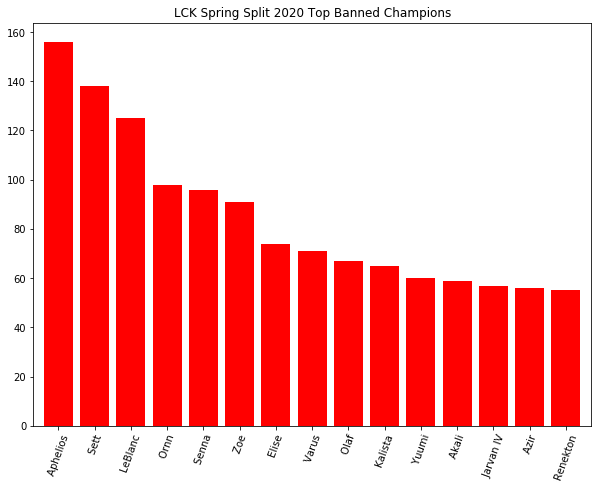

In [34]:
top_bans(lck_data,'LCK')

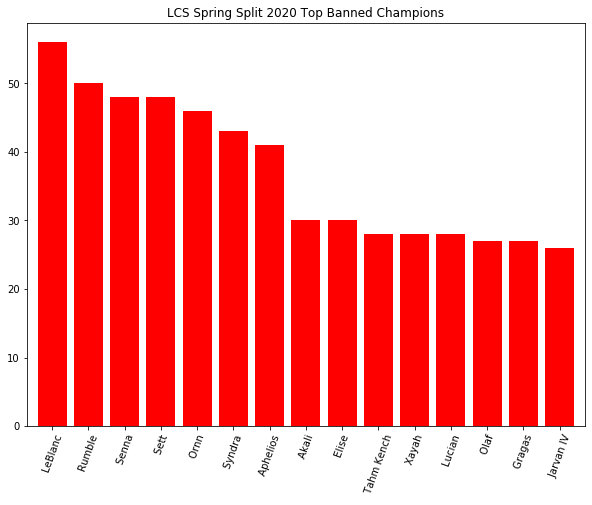

In [35]:
top_bans(lcs_data,'LCS')

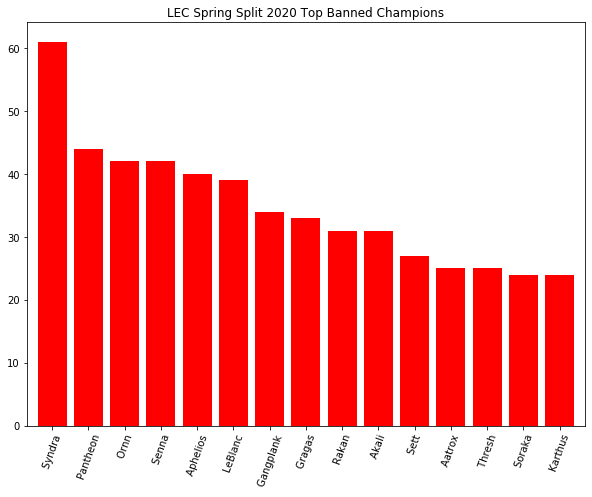

In [36]:
top_bans(lec_data,'LEC')

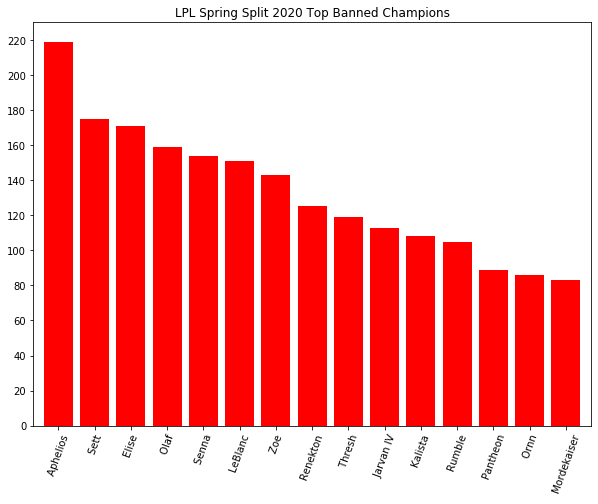

In [37]:
top_bans(lpl_data,'LPL')

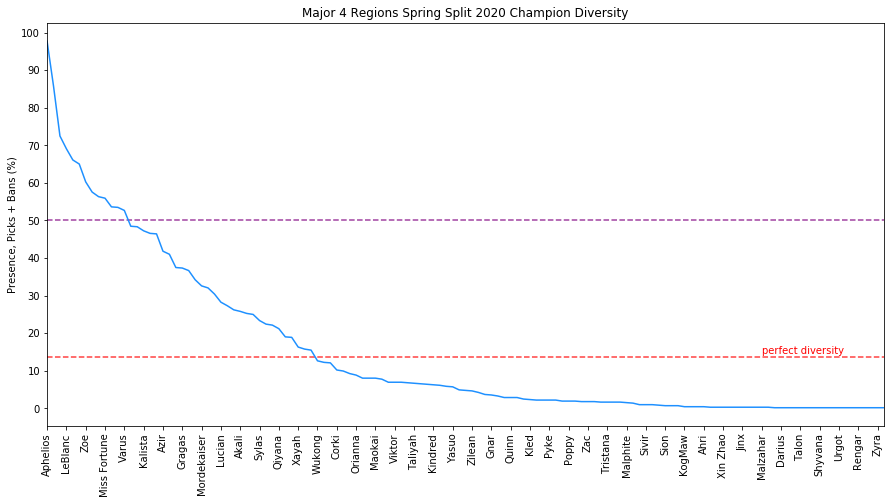

131 unique champs were played


In [38]:
champ_diversity(total_data,'Major 4 Regions')

In [39]:
def meta_champs(data):
    data1 = data.loc[data['True Presence'] >= 50,['Champion','Picks','Bans','True Presence']]
    data2 = data.loc[data['True Presence'] >= 30,['Champion','Picks','Bans','True Presence']]
    data3 = data.loc[data['True Presence'] >= 13.51,['Champion','Picks','Bans','True Presence']]
    data4 = data.loc[data['True Presence'] <= 1,['Champion','Picks','Bans','True Presence']]
    return(len(data1),len(data2),len(data3),len(data4),data1.Champion)

In [40]:
meta_champs(lcs_data)

(15, 29, 41, 61, 0        Aphelios
 1            Sett
 2          Aatrox
 3          Syndra
 4           Senna
 5            Ornn
 6      Tahm Kench
 7         LeBlanc
 8          Rumble
 9          Gragas
 10        Lee Sin
 11            Zoe
 12      Jarvan IV
 13          Xayah
 14       Nautilus
 Name: Champion, dtype: object)

In [41]:
meta_champs(lck_data)

(14, 26, 41, 62, 0          Aphelios
 1              Sett
 2              Ornn
 3           LeBlanc
 4               Zoe
 5         Jarvan IV
 6             Senna
 7      Miss Fortune
 8           Kalista
 9              Olaf
 10             Azir
 11            Varus
 12         Nautilus
 13            Elise
 Name: Champion, dtype: object)

In [42]:
meta_champs(lpl_data)

(17, 25, 37, 67, 0          Aphelios
 1              Sett
 2             Elise
 3          Renekton
 4         Jarvan IV
 5             Varus
 6           LeBlanc
 7              Olaf
 8             Senna
 9               Zoe
 10           Thresh
 11         Nautilus
 12             Ornn
 13     Miss Fortune
 14          Kalista
 15           Rumble
 16          Lee Sin
 Name: Champion, dtype: object)

In [43]:
meta_champs(lec_data)

(16, 25, 43, 41, 0          Aphelios
 1            Gragas
 2            Syndra
 3              Ornn
 4              Sett
 5             Senna
 6           LeBlanc
 7          Pantheon
 8             Rakan
 9         Gangplank
 10           Aatrox
 11         Nautilus
 12            Braum
 13     Miss Fortune
 14           Thresh
 15          Lee Sin
 Name: Champion, dtype: object)

In [44]:
meta_champs(total_data)

(13, 27, 42, 56, 0         Aphelios
 1             Sett
 2             Ornn
 3          LeBlanc
 4            Senna
 5        Jarvan IV
 6              Zoe
 7         Nautilus
 8            Elise
 9     Miss Fortune
 10          Aatrox
 11            Olaf
 12           Varus
 Name: Champion, dtype: object)

In [45]:
sad = lcs_data.loc[lcs_data['True Presence'] ==0,['Champion','Picks','Bans','True Presence']]

In [46]:
sad_bois=sad.Champion.tolist()

In [47]:
sad.Champion

87          Wukong
88           Amumu
89        Katarina
90         Shyvana
91          Twitch
          ...     
143         Rengar
144     Tryndamere
145         Illaoi
146        Evelynn
147           Nami
Name: Champion, Length: 61, dtype: object

In [48]:
uniquelo = [87,100,107,105,131]
pres_50 = [15,17,16,14,13]
pres_30 = [29,25,25,26,27]
pres_1 = [61,67,41,62,56]

In [49]:
diversity_scale['unique champions']=uniquelo
diversity_scale['# of champions with at least 50% presence']=pres_50
diversity_scale['# of champions with at least 30% presence']=pres_30
diversity_scale['# of champions with less than 1% presence']=pres_1

In [50]:
diversity_scale=diversity_scale.set_index('region')

In [51]:
diversity_scale.to_csv('spring_2020/comp.csv')

In [52]:
diversity_scale

,diversity,unique champions,# of champions with at least 50% presence,# of champions with at least 30% presence,# of champions with less than 1% presence
region,,,,,
LCS,26.921892,87,15,29,61
LPL,28.163225,100,17,25,67
LEC,30.846802,107,16,25,41
LCK,31.856712,105,14,26,62
All,32.318233,131,13,27,56
